# IMPORTAÇÃO DE DADOS E DE PACOTES

In [1]:
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('joaoseries.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

# PRIMEIRAS VISUALIZAÇÕRS

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [3]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


# TRADUÇÃO DA BASE DE DADOS

In [4]:
df_traduzida = df.rename(columns={'Order Date':'Data','Segment':'Segmento','Country':'Pais','City':'Cidade','State':'Estado','Region':'Região','Category':'CategoriaProduto','Sub-Category':'SubCategoria','Product Name':'ProdutoNome','Sales':'Preço'})
df_traduzida.head(1)

,Row ID,Order ID,Data,Ship Date,Ship Mode,Customer ID,Customer Name,Segmento,Pais,Cidade,Estado,Postal Code,Região,Product ID,CategoriaProduto,SubCategoria,ProdutoNome,Preço
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


In [5]:
df_traduzida.shape

(9800, 18)

# MANIPULAÇÃO E TRATAMENTO DE DADOS 

### EXCLUINDO VARIAVVÉIS DESNECESSÁRIAS

In [6]:
del df_traduzida['Row ID']
del df_traduzida['Ship Date']
del df_traduzida['Ship Mode']
del df_traduzida['Customer ID']
del df_traduzida['Customer Name']
del df_traduzida['Postal Code']
del df_traduzida['Order ID']
del df_traduzida['Product ID']

In [7]:
df_traduzida.head(1)

,Data,Segmento,Pais,Cidade,Estado,Região,CategoriaProduto,SubCategoria,ProdutoNome,Preço
0,08/11/2017,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


### CONVERSÃO DE VARIAVEIS

In [8]:
df_traduzida['Data'] = pd.to_datetime(df_traduzida['Data'], format='%d/%m/%Y')


### VALORES NULOS E DUPLICADOS

In [9]:
(df_traduzida.isnull().sum() / len(df_traduzida['Preço']))*100

Data               0.00
Segmento           0.00
Pais               0.00
Cidade             0.00
Estado             0.00
Região             0.00
CategoriaProduto   0.00
SubCategoria       0.00
ProdutoNome        0.00
Preço              0.00
dtype: float64

In [10]:
df_traduzida.duplicated().sum()

1

In [11]:
df_traduzida = df_traduzida.drop_duplicates()

# ANÁLISE DE EXPLORATÓRIA

### ESTATÍSTICA

In [12]:
df_traduzida.describe()

,Data,Preço
count,9799,9799.00
mean,2017-05-01 07:02:29.525461760,230.76
min,2015-01-03 00:00:00,0.44
25%,2016-05-24 12:00:00,17.25
50%,2017-06-26 00:00:00,54.48
75%,2018-05-15 00:00:00,210.57
max,2018-12-30 00:00:00,22638.48
std,NaN,626.68


### MODA

In [13]:
from statistics import mode

mode(df_traduzida['Preço'])

12.96

### ASSIMETRIA

In [14]:
df_traduzida['Preço'].skew()

12.982858261241196

### CURTOSE

In [15]:
df_traduzida['Preço'].kurt()

304.4145694804776

### HISTOGRAMA

<Axes: >

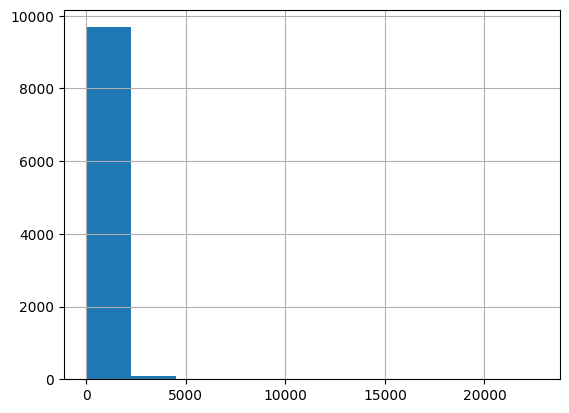

In [16]:
df_traduzida['Preço'].hist()

## verificação de outliers 

Preço : float64


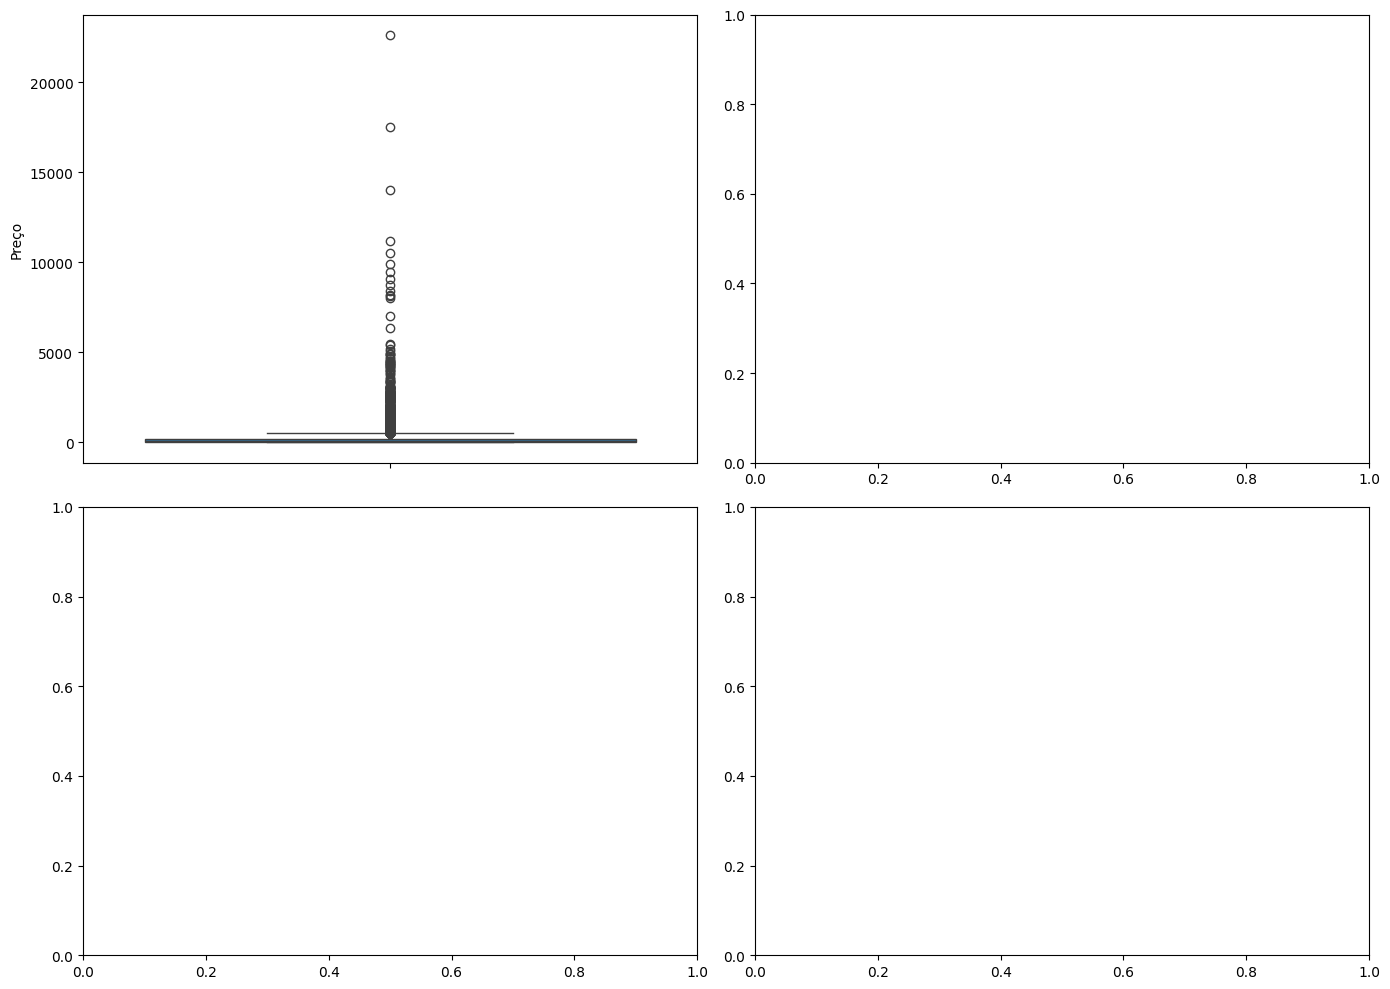

In [17]:
variaveis_numericas = []
for i in df_traduzida.columns[0:16].tolist():
        if df_traduzida.dtypes[i] == 'int64' or df_traduzida.dtypes[i] == 'float64':            
            print(i, ':' , df_traduzida.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(2, 2) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_traduzida, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0      

### valores unicos em cada variavel

In [18]:
valores_unicos = []
for i in df_traduzida.columns[0:8].tolist():
    print(i, ':', len(df_traduzida[i].astype(str).value_counts()))
    valores_unicos.append(len(df_traduzida[i].astype(str).value_counts()))

Data : 1230
Segmento : 3
Pais : 1
Cidade : 529
Estado : 49
Região : 4
CategoriaProduto : 3
SubCategoria : 17


# ANÁLISE DE DADOS

In [19]:
df_traduzida.head()

,Data,Segmento,Pais,Cidade,Estado,Região,CategoriaProduto,SubCategoria,ProdutoNome,Preço
0,2017-11-08,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2017-11-08,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,2017-06-12,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,2016-10-11,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,2016-10-11,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37


In [20]:
df_traduzida.groupby(df_traduzida['Segmento']).size() 

Segmento
Consumer       5101
Corporate      2953
Home Office    1745
dtype: int64

In [21]:
df_traduzida.groupby(df_traduzida['Cidade']).size() 

Cidade
Aberdeen               1
Abilene                1
Akron                 20
Albuquerque           14
Alexandria            16
Allen                  4
Allentown              7
Altoona                2
Amarillo              10
Anaheim               19
Andover                4
Ann Arbor              5
Antioch                1
Apopka                 7
Apple Valley           9
Appleton               2
Arlington             60
Arlington Heights      1
Arvada                 4
Asheville              7
Athens                 6
Atlanta               39
Atlantic City          1
Auburn                24
Aurora                68
Austin                39
Avondale               6
Bakersfield           16
Baltimore             43
Bangor                 5
Bartlett               1
Bayonne                3
Baytown                1
Beaumont               3
Bedford                5
Belleville            10
Bellevue               6
Bellingham             3
Bethlehem              5
Beverly           

In [22]:
df_traduzida.groupby(df_traduzida['Estado']).size() 

Estado
Alabama                   61
Arizona                  223
Arkansas                  60
California              1946
Colorado                 179
Connecticut               82
Delaware                  93
District of Columbia      10
Florida                  373
Georgia                  177
Idaho                     21
Illinois                 483
Indiana                  135
Iowa                      26
Kansas                    24
Kentucky                 137
Louisiana                 41
Maine                      8
Maryland                 105
Massachusetts            135
Michigan                 253
Minnesota                 89
Mississippi               53
Missouri                  66
Montana                   15
Nebraska                  38
Nevada                    39
New Hampshire             27
New Jersey               122
New Mexico                37
New York                1097
North Carolina           247
North Dakota               7
Ohio                     453
Oklahom

In [23]:
df_traduzida.groupby(df_traduzida['CategoriaProduto']).size() 

CategoriaProduto
Furniture          2077
Office Supplies    5909
Technology         1813
dtype: int64

In [24]:
df_traduzida.groupby(df_traduzida['SubCategoria']).size() 

SubCategoria
Accessories     756
Appliances      459
Art             785
Binders        1492
Bookcases       226
Chairs          606
Copiers          66
Envelopes       248
Fasteners       214
Furnishings     931
Labels          357
Machines        115
Paper          1338
Phones          876
Storage         832
Supplies        184
Tables          314
dtype: int64

In [25]:
df_traduzida.groupby(df_traduzida['ProdutoNome']).size() 

ProdutoNome
"While you Were Out" Message Book, One Form per Page                                                                                3
#10 Gummed Flap White Envelopes, 100/Box                                                                                            4
#10 Self-Seal White Envelopes                                                                                                       4
#10 White Business Envelopes,4 1/8 x 9 1/2                                                                                          6
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                                            10
#10- 4 1/8" x 9 1/2" Security-Tint Envelopes                                                                                        8
#10-4 1/8" x 9 1/2" Premium Diagonal Seam Envelopes                                                                                 2
#6 3/4 Gummed Flap White Envelopes                

## SEGMETANDO MODO DE VENDAS CONSUMIDORA

In [26]:
consumo = df_traduzida.loc[df_traduzida['Segmento'] == 'Consumer']
consumo.head(1)

,Data,Segmento,Pais,Cidade,Estado,Região,CategoriaProduto,SubCategoria,ProdutoNome,Preço
0,2017-11-08,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


In [27]:
consumidora = consumo[['Data','Preço']]
consumidora.head()                      

,Data,Preço
0,2017-11-08,261.96
1,2017-11-08,731.94
3,2016-10-11,957.58
4,2016-10-11,22.37
5,2015-06-09,48.86


# ANALISANDO AS SERIES TEMPORAIS

In [28]:
# Certifique-se de que a coluna 'data' está no formato datetime
consumidora['Data'] = pd.to_datetime(consumidora['Data'])

# Agora, agregando os dados por data e somando os valores de 'quantidade'
df_agregado = consumidora.groupby('Data')['Preço'].sum().reset_index()

# Verificando as datas
data_min = df_agregado['Data'].min()
data_max = df_agregado['Data'].max()
duration = data_max - data_min
frequencia = df_agregado['Data'].diff().mode()[0]  # Calcula a diferença entre as datas consecutivas e encontra a moda

print(f'Data mínima: {data_min}')
print(f'Data máxima: {data_max}')
print(f'Duração do período: {duration}')
print(f'Frequência mais comum dos registros: {frequencia}')

Data mínima: 2015-01-03 00:00:00
Data máxima: 2018-12-30 00:00:00
Duração do período: 1457 days 00:00:00
Frequência mais comum dos registros: 1 days 00:00:00


In [29]:
df_agregado.head()

,Data,Preço
0,2015-01-03,16.45
1,2015-01-05,19.54
2,2015-01-06,19.44
3,2015-01-07,87.16
4,2015-01-09,40.54


In [30]:
import plotly.express as px

# Criando o boxplot com Plotly
fig = px.box(df_agregado, y='Preço', title='Boxplot da Quantidade Vendida')

# Mostrando o gráfico
fig.show()

In [31]:
# Filtrando o dataframe para eliminar registros com valores negativos (estornos)
df_filtrado = consumidora[consumidora['Preço'] > 0]

# Agora df_filtrado contém apenas registros com quantidades positivas
# Verificando as primeiras linhas para confirmar
print(df_filtrado.head())

        Data  Preço
0 2017-11-08 261.96
1 2017-11-08 731.94
3 2016-10-11 957.58
4 2016-10-11  22.37
5 2015-06-09  48.86


In [32]:
from sklearn.model_selection import TimeSeriesSplit

# Suponha que 'df_filtrado' é o seu dataframe após remover os estornos
df_filtrado.sort_values('Data', inplace=True)
y = df_filtrado['Preço']  # ou 'quantidade_liquida' se você calculou essa coluna

# Definição do número de splits para TSCV
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Aplicação do TSCV
for i, (train_index, test_index) in enumerate(tscv.split(y)):
    train = df_filtrado.iloc[train_index]
    test = df_filtrado.iloc[test_index]
    print(f'Split {i+1}')
    print(f'Treino de {train["Data"].iloc[0]} até {train["Data"].iloc[-1]}')
    print(f'Teste de {test["Data"].iloc[0]} até {test["Data"].iloc[-1]}')
    print('---')

Split 1
Treino de 2015-01-03 00:00:00 até 2015-11-18 00:00:00
Teste de 2015-11-18 00:00:00 até 2016-09-26 00:00:00
---
Split 2
Treino de 2015-01-03 00:00:00 até 2016-09-26 00:00:00
Teste de 2016-09-26 00:00:00 até 2017-06-05 00:00:00
---
Split 3
Treino de 2015-01-03 00:00:00 até 2017-06-05 00:00:00
Teste de 2017-06-05 00:00:00 até 2017-12-14 00:00:00
---
Split 4
Treino de 2015-01-03 00:00:00 até 2017-12-14 00:00:00
Teste de 2017-12-14 00:00:00 até 2018-09-01 00:00:00
---
Split 5
Treino de 2015-01-03 00:00:00 até 2018-09-01 00:00:00
Teste de 2018-09-01 00:00:00 até 2018-12-30 00:00:00
---


## Capturar tendências, padrões sazonais e outras dependências temporais.

### 1. Criação de Variáveis Baseadas em LAGs
LAGs são valores anteriores na série temporal que podem ajudar a prever o valor futuro. A ideia é que observações passadas têm influência nos valores futuros.

Variáveis de LAG: Você pode criar variáveis que representam os valores da série em dias anteriores. Por exemplo, LAG1 poderia ser o valor de vendas do dia anterior, LAG2 o de dois dias atrás, e assim por diante

In [33]:
# Resetando o índice para garantir que ele seja único
df_filtrado.reset_index(drop=True, inplace=True)  # Drop=True remove a coluna do índice anterior

# Criando LAGs diretamente no DataFrame
df_filtrado['LAG1'] = df_filtrado['Preço'].shift(1)
df_filtrado['LAG2'] = df_filtrado['Preço'].shift(2)

# Garantindo que 'Data' é uma coluna para extrair o dia da semana
df_filtrado['day_of_week'] = df_filtrado['Data'].dt.dayofweek
dummies = pd.get_dummies(df_filtrado['day_of_week'], prefix='weekday')

# Concatenando as variáveis dummy ao DataFrame
df_filtrado = pd.concat([df_filtrado, dummies], axis=1)

# Mostrando o resultado
print(df_filtrado.head())



        Data  Preço  LAG1  LAG2  day_of_week  weekday_0  weekday_1  weekday_2  \
0 2015-01-03  16.45   NaN   NaN            5      False      False      False   
1 2015-01-05  19.54 16.45   NaN            0       True      False      False   
2 2015-01-06  19.44 19.54 16.45            1      False       True      False   
3 2015-01-07  76.73 19.44 19.54            2      False      False       True   
4 2015-01-07  10.43 76.73 19.44            2      False      False       True   

   weekday_3  weekday_4  weekday_5  weekday_6  
0      False      False       True      False  
1      False      False      False      False  
2      False      False      False      False  
3      False      False      False      False  
4      False      False      False      False  


# Análise do DataFrame

O resultado mostra que foram criadas variáveis de LAG e variáveis dummy para os dias da semana a partir dos dados de vendas. Aqui está uma análise detalhada das colunas geradas:

- `data`: A coluna de datas, servindo como índice temporal para os dados.
- `quantidade`: Representa a quantidade vendida no dia correspondente.
- `LAG1`: Reflete o valor da quantidade vendida no dia anterior, ajudando o modelo a entender a dependência das vendas no dia atual em relação ao anterior.
- `LAG2`: Representa o valor da quantidade vendida dois dias antes, ajudando a identificar padrões ou tendências que ocorrem com esse atraso.
- `day_of_week`: Mostra o dia da semana (0 para segunda-feira, 1 para terça-feira, etc.), útil para capturar padrões semanais de vendas.
- `weekday_0` a `weekday_6`: São variáveis dummy para cada dia da semana, úteis para modelar efeitos específicos dos dias nas vendas.

#### Insights:

1. **LAGs:**
   - Os valores `NaN` em `LAG1` e `LAG2` nas primeiras linhas são esperados devido à ausência de dados anteriores. Esses LAGs são cruciais para compreender como as vendas anteriores influenciam as atuais.

2. **Variáveis Dummy do Dia da Semana:**
   - As variáveis dummy (`weekday_0` a `weekday_6`) indicam claramente o dia da semana, permitindo ao modelo captar variações nas vendas que podem ocorrer de acordo com o dia da semana.

#### Próximos Passos:

- **Tratamento de NaN:** Antes de prosseguir para a modelagem, é necessário decidir como lidar com os valores `NaN` em `LAG1` e `LAG2`, possivelmente substituindo-os por 0, média ou mediana.
- **Análise de Padrões:** Examinar as correlações e padrões entre as vendas, LAGs e dias da semana pode revelar insights valiosos sobre o comportamento das vendas.
- **Modelagem de Séries Temporais:** Com as variáveis preparadas, é possível avançar na modelagem de séries temporais usando técnicas como ARIMA, SARIMA ou LSTM para prever vendas futuras.

### 2. Análise dos Dias da Semana
Dias da semana podem ter um impacto significativo nas vendas, com padrões variando entre dias úteis e fins de semana, por exemplo.

Variáveis Dummy para Dias da Semana: Crie variáveis dummy para cada dia da semana para capturar efeitos sazonais que variam nesses dias

In [34]:
# Calculando a correlação entre as variáveis
correlacoes = df_filtrado[['Preço', 'LAG1', 'LAG2'] + [f'weekday_{i}' for i in range(7)]].corr()

# Exibindo a matriz de correlação
print(correlacoes)

           Preço  LAG1  LAG2  weekday_0  weekday_1  weekday_2  weekday_3  \
Preço       1.00  0.00  0.02      -0.03       0.00       0.01       0.03   
LAG1        0.00  1.00  0.00      -0.03       0.01      -0.00       0.02   
LAG2        0.02  0.00  1.00      -0.01      -0.00       0.00       0.01   
weekday_0  -0.03 -0.03 -0.01       1.00      -0.21      -0.16      -0.10   
weekday_1   0.00  0.01 -0.00      -0.21       1.00      -0.19      -0.12   
weekday_2   0.01 -0.00  0.00      -0.16      -0.19       1.00      -0.09   
weekday_3   0.03  0.02  0.01      -0.10      -0.12      -0.09       1.00   
weekday_4  -0.01 -0.01  0.01      -0.15      -0.17      -0.13      -0.09   
weekday_5   0.01  0.02  0.01      -0.20      -0.23      -0.18      -0.12   
weekday_6  -0.01  0.00 -0.01      -0.20      -0.23      -0.18      -0.12   

           weekday_4  weekday_5  weekday_6  
Preço          -0.01       0.01      -0.01  
LAG1           -0.01       0.02       0.00  
LAG2            0.01       0

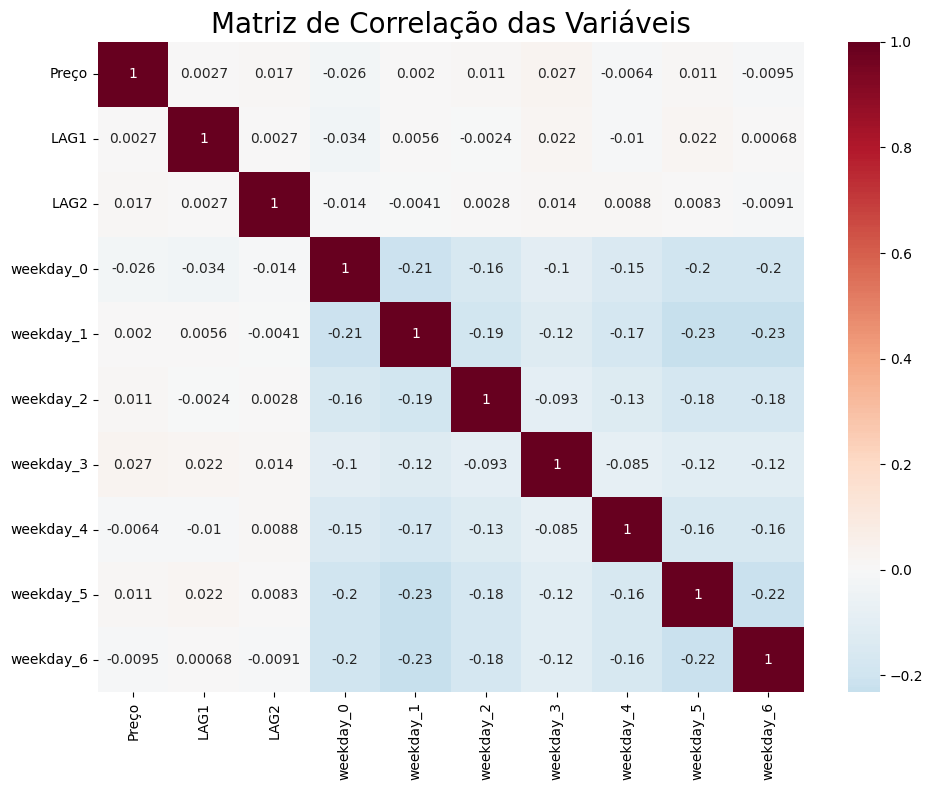

In [35]:
# Calculando a matriz de correlação
correlacoes = df_filtrado[['Preço', 'LAG1', 'LAG2'] + [f'weekday_{i}' for i in range(7)]].corr()

# Configurando o tamanho da figura
plt.figure(figsize=(10, 8))

# Criando o heatmap
sns.heatmap(correlacoes, annot=True, cmap='RdBu_r', center=0)

# Adicionando títulos e labels
plt.title('Matriz de Correlação das Variáveis')
plt.show()

#### Correlação entre Vendas e LAGs
**Preço e LAG1**: A correlação é ligeiramente negativa (-0.0044), o que indica uma relação muito fraca e inversa entre as vendas do dia anterior e as vendas atuais. Isso significa que um aumento nas vendas no dia anterior não está significativamente relacionado a um aumento ou diminuição nas vendas do dia atual.


**Preço e LAG2:** Similarmente, a correlação entre as vendas atuais e as de dois dias atrás é também levemente negativa (-0.00098), sugerindo uma influência mínima das vendas de dois dias atrás nas vendas atuais.

**Correlação entre Vendas e Dias da Semana**

**weekday_0 a weekday_6 (Segunda a Domingo)**: As correlações entre as vendas e os dias da semana variam um pouco, mas em geral são muito baixas, o que sugere que não há uma forte influência do dia específico da semana nas vendas totais.

No entanto, alguns pontos a notar:

**weekday_0 (Segunda-Feira):** Tem uma correlação mais negativa com as vendas (-0.026) do que os outros dias, o que pode indicar vendas mais baixas neste dia em particular ou menos variação nas vendas relacionada a esse dia.

**weekday_4 (Domingo):** Mostra uma correlação ligeiramente positiva com as vendas (0.0095), o que pode sugerir um pequeno aumento ou variação positiva nas vendas nesta dia.

### 3. Verificação de Sazonalidade
Além dos dias da semana, outras sazonalidades podem ser relevantes, como mensal, trimestral, ou sazonalidade de feriados.

Variáveis Sazonais: Identifique padrões sazonais nos dados e crie variáveis para capturá-los, como indicadores de mês, trimestre, ou feriados.

In [36]:
# Extraíndo o mês da data e criando uma coluna 'mês'
df_filtrado['mes'] = df_filtrado['Data'].dt.month

# Opcionalmente, criar variáveis dummy para os meses
mes_dummies = pd.get_dummies(df_filtrado['mes'], prefix='mes')
df_filtrado = pd.concat([df_filtrado, mes_dummies], axis=1)

In [37]:
# Extraíndo o trimestre da data e criando uma coluna 'trimestre'
df_filtrado['trimestre'] = df_filtrado['Data'].dt.to_period('Q')

In [38]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5101 entries, 0 to 5100
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data         5101 non-null   datetime64[ns]
 1   Preço        5101 non-null   float64       
 2   LAG1         5100 non-null   float64       
 3   LAG2         5099 non-null   float64       
 4   day_of_week  5101 non-null   int32         
 5   weekday_0    5101 non-null   bool          
 6   weekday_1    5101 non-null   bool          
 7   weekday_2    5101 non-null   bool          
 8   weekday_3    5101 non-null   bool          
 9   weekday_4    5101 non-null   bool          
 10  weekday_5    5101 non-null   bool          
 11  weekday_6    5101 non-null   bool          
 12  mes          5101 non-null   int32         
 13  mes_1        5101 non-null   bool          
 14  mes_2        5101 non-null   bool          
 15  mes_3        5101 non-null   bool          
 16  mes_4 

### 4. Decomposição de Séries Temporais
Uma análise mais aprofundada pode envolver a decomposição da série temporal em tendência, sazonalidade e resíduo, o que pode fornecer insights sobre a natureza dos dados.

Tendência e Sazonalidade: Utilize técnicas de decomposição para extrair e talvez modelar separadamente a tendência e a sazonalidade da série.

#### **A decomposição permite analisar as componentes individuais da série temporal:**

Tendência: Mostra a direção de longo prazo dos dados, permitindo identificar se a série está aumentando, diminuindo ou está estável ao longo do tempo.
Sazonalidade: Revela padrões que se repetem em intervalos regulares, como diariamente, semanalmente, mensalmente, etc.
Resíduo: Compreende os elementos aleatórios ou irregulares que não são explicados pela tendência ou sazonalidade.

**Tendência**: Mostra a direção geral dos seus dados ao longo do tempo, como se as vendas estão aumentando, diminuindo ou se mantendo estáveis a longo prazo.

**Sazonalidade**: Mostra padrões que se repetem em intervalos regulares, como aumentos nas vendas todo mês de dezembro, ou todo dia da semana.

**Resíduos**: São o que sobra depois de retirarmos a tendência e a sazonalidade, geralmente são variações aleatórias que não seguem um padrão regular.

## Usando Python/statsmodel

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Suponha que 'quantidade' é a coluna de interesse
# O DataFrame deve estar ordenado por data e indexado por ela
decomposition = seasonal_decompose(df_filtrado['Preço'], model='additive', period=365)

In [40]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Criando subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=('Original', 'Tendência', 'Sazonalidade', 'Resíduo'))

# Adicionando a série original
fig.add_trace(go.Scatter(x=df_filtrado.index, y=df_filtrado['Preço'], name='Original'), row=1, col=1)

# Adicionando a tendência
fig.add_trace(go.Scatter(x=df_filtrado.index, y=decomposition.trend, name='Tendência'), row=2, col=1)

# Adicionando a sazonalidade
fig.add_trace(go.Scatter(x=df_filtrado.index, y=decomposition.seasonal, name='Sazonalidade'), row=3, col=1)

# Adicionando o resíduo
fig.add_trace(go.Scatter(x=df_filtrado.index, y=decomposition.resid, name='Resíduo'), row=4, col=1)

# Atualizando o layout
fig.update_layout(height=800, width=700, title_text="Decomposição de Séries Temporais")
fig.show()

#### **Original**
A série original mostra as vendas ao longo do tempo. Altos e baixos indicam variações nas vendas, que podem ser devidas a fatores sazonais, eventos ou outras influências.

**Tendência**

A tendência parece suavizar as flutuações de curto prazo e mostra um movimento geral das vendas ao longo do tempo. Se há um padrão de subida ou descida na tendência, isso pode indicar um crescimento ou declínio no interesse ou demanda geral pelo produto.

Observar qualquer mudança consistente na tendência ao longo do tempo é importante. Por exemplo, se a tendência está consistentemente subindo ou descendo.

**Sazonalidade**

O componente sazonal exibe padrões que se repetem com regularidade ao longo da série temporal. Esse padrão pode corresponder a fatores sazonais, como feriados, estações do ano, ou eventos específicos que impactam as vendas.
A sazonalidade mostra picos e vales que podem ser anuais, mensais, semanais etc. Verificar a amplitude e a frequência desses ciclos pode ajudar a entender quão significativos são os efeitos sazonais e quando eles ocorrem.

**Resíduo**

Os resíduos representam a variação nas vendas que não é explicada pela tendência nem pela sazonalidade. Isso pode incluir efeitos aleatórios ou não capturados pelo modelo de decomposição, como campanhas de marketing, mudanças econômicas não previstas ou qualquer outro fator aleatório.
Resíduos com grandes desvios da linha zero podem indicar eventos ou influências não modeladas na série temporal. Se os resíduos parecem ser grandes ou apresentam padrões não aleatórios, isso pode sugerir que o modelo de decomposição não capturou todos os aspectos dos dados.

### TESTE DE ESTACIONALIDADE

In [41]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_filtrado['Preço'].dropna())

# Extrai os valores críticos
critical_values = result[4]

print(f'Valores Críticos (1%, 5%, 10%): {critical_values}')

Valores Críticos (1%, 5%, 10%): {'1%': -3.4316328616522527, '5%': -2.862106888575586, '10%': -2.5670717550557476}


In [42]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df_filtrado['Preço'].dropna())
print(f'Teste ADF:{result[0]}')
print(f'p-valor:{result[1]}')

Teste ADF:-71.20546392377065
p-valor:0.0


In [43]:
import pandas as pd

# Supondo que 'df_filtrado' seja o DataFrame que você está trabalhando

# Resetando o índice para garantir que ele seja único
df_filtrado.reset_index(inplace=True)

# Criando LAGs diretamente no DataFrame
df_filtrado['LAG1'] = df_filtrado['Preço'].shift(1)
df_filtrado['LAG2'] = df_filtrado['Preço'].shift(2)

# Convertendo a coluna 'Data' para o tipo datetime, se necessário
# df_filtrado['Data'] = pd.to_datetime(df_filtrado['Data'])

# Garantindo que 'Data' é uma coluna para extrair o dia da semana
df_filtrado['day_of_week'] = df_filtrado['Data'].dt.dayofweek
dummies = pd.get_dummies(df_filtrado['day_of_week'], prefix='weekday')

# Concatenando as variáveis dummy ao DataFrame
df_filtrado = pd.concat([df_filtrado, dummies], axis=1)

# Mostrando o resultado
print(df_filtrado.head())


   index       Data  Preço  LAG1  LAG2  day_of_week  weekday_0  weekday_1  \
0      0 2015-01-03  16.45   NaN   NaN            5      False      False   
1      1 2015-01-05  19.54 16.45   NaN            0       True      False   
2      2 2015-01-06  19.44 19.54 16.45            1      False       True   
3      3 2015-01-07  76.73 19.44 19.54            2      False      False   
4      4 2015-01-07  10.43 76.73 19.44            2      False      False   

   weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  mes  mes_1  mes_2  \
0      False      False      False       True      False    1   True  False   
1      False      False      False      False      False    1   True  False   
2      False      False      False      False      False    1   True  False   
3       True      False      False      False      False    1   True  False   
4       True      False      False      False      False    1   True  False   

   mes_3  mes_4  mes_5  mes_6  mes_7  mes_8  mes_9  mes_10  me

#### **Conclusão da Análise**

Analisar se a **tendência** é estável, crescente ou decrescente ajuda a entender o comportamento geral das vendas ao longo do tempo.

Avaliar a **sazonalidade** ajuda no planejamento de ações de marketing e estoque.

Investigar os **resíduos** pode indicar a necessidade de refinar o modelo ou incluir outras variáveis que podem estar afetando as vendas.

Concluimos que a série é estacionária, ou seja, média e variância, permanecem constantes ao longo do tempo. Isso significa que a série não exibe tendências sistemáticas, sazonalidades ou variações periódicas.

A decomposição ajuda a preparar o terreno para modelagem preditiva, como ajustar modelos de séries temporais (ARIMA, SARIMA) ou redes neurais (LSTM), pois você terá uma noção mais clara dos padrões subjacentes aos dados.

# MACHINE LARNING

## LSTM

In [44]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5101 entries, 0 to 5100
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        5101 non-null   int64         
 1   Data         5101 non-null   datetime64[ns]
 2   Preço        5101 non-null   float64       
 3   LAG1         5100 non-null   float64       
 4   LAG2         5099 non-null   float64       
 5   day_of_week  5101 non-null   int32         
 6   weekday_0    5101 non-null   bool          
 7   weekday_1    5101 non-null   bool          
 8   weekday_2    5101 non-null   bool          
 9   weekday_3    5101 non-null   bool          
 10  weekday_4    5101 non-null   bool          
 11  weekday_5    5101 non-null   bool          
 12  weekday_6    5101 non-null   bool          
 13  mes          5101 non-null   int32         
 14  mes_1        5101 non-null   bool          
 15  mes_2        5101 non-null   bool          
 16  mes_3 

In [45]:
df_filtrado = df_filtrado.dropna()
df_filtrado = df_filtrado.drop_duplicates()
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5099 entries, 2 to 5100
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        5099 non-null   int64         
 1   Data         5099 non-null   datetime64[ns]
 2   Preço        5099 non-null   float64       
 3   LAG1         5099 non-null   float64       
 4   LAG2         5099 non-null   float64       
 5   day_of_week  5099 non-null   int32         
 6   weekday_0    5099 non-null   bool          
 7   weekday_1    5099 non-null   bool          
 8   weekday_2    5099 non-null   bool          
 9   weekday_3    5099 non-null   bool          
 10  weekday_4    5099 non-null   bool          
 11  weekday_5    5099 non-null   bool          
 12  weekday_6    5099 non-null   bool          
 13  mes          5099 non-null   int32         
 14  mes_1        5099 non-null   bool          
 15  mes_2        5099 non-null   bool          
 16  mes_3      

In [46]:
df_filtrado_distinct = df_filtrado.drop_duplicates(subset=['Data', 'Preço']).loc[:, ['Data', 'Preço']]
df_filtrado_distinct.head()

,Data,Preço
2,2015-01-06,19.44
3,2015-01-07,76.73
4,2015-01-07,10.43
5,2015-01-09,31.20
6,2015-01-09,9.34


In [47]:
# Verificar se há valores NaN no conjunto de dados original
print(df_filtrado.isnull().sum())

index          0
Data           0
Preço          0
LAG1           0
LAG2           0
day_of_week    0
weekday_0      0
weekday_1      0
weekday_2      0
weekday_3      0
weekday_4      0
weekday_5      0
weekday_6      0
mes            0
mes_1          0
mes_2          0
mes_3          0
mes_4          0
mes_5          0
mes_6          0
mes_7          0
mes_8          0
mes_9          0
mes_10         0
mes_11         0
mes_12         0
trimestre      0
weekday_0      0
weekday_1      0
weekday_2      0
weekday_3      0
weekday_4      0
weekday_5      0
weekday_6      0
dtype: int64


In [48]:
import time
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Ordenando o DataFrame cronologicamente
df_filtrado.sort_values('Data', inplace=True)

# Normalizando as colunas de features, excluindo 'data' e 'trimestre'
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df_filtrado.drop(['Data', 'trimestre'], axis=1))

# Função para criar um dataset estruturado para o modelo LSTM
def create_dataset(dataset, look_back=1, forecast_horizon=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - forecast_horizon + 1):
        X.append(dataset[i:(i + look_back), :])
        y.append(dataset[i + look_back:i + look_back + forecast_horizon, 0])
    return np.array(X), np.array(y)

# Definindo look_back e forecast_horizon
look_back = 30
forecast_horizon = 15

# Criando a estrutura de dados para o modelo LSTM
X, y = create_dataset(scaled_features, look_back, forecast_horizon)

# Dividindo os dados com TSCV
tscv = TimeSeriesSplit(n_splits=5)

test_loss_list = []

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Redimensionando para [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

    # Construindo a arquitetura do modelo LSTM
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, X_train.shape[2])))
    model.add(Dense(forecast_horizon))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Treinando o modelo
    start_time = time.time()
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    end_time = time.time()

    training_time = end_time - start_time
    test_loss = model.evaluate(X_test, y_test, verbose=0)

    test_loss_list.append(test_loss)

    print(f'Fold {fold+1}')
    print(f'Training time: {training_time:.2f} seconds')
    print(f'Test Loss: {test_loss}\n')

# Mostrar as métricas finais após todas as folds
average_test_loss = np.mean(test_loss_list)
print(f'Average Test Loss after all folds: {average_test_loss}')

# Salvando o modelo treinado
model.save('my_lstm_model.h5')

# O código para download do modelo, caso esteja usando um ambiente como Google Colab, ficaria aqui


Fold 1
Training time: 19.25 seconds
Test Loss: 0.029971813783049583

Fold 2
Training time: 29.33 seconds
Test Loss: 0.003004904370754957

Fold 3
Training time: 39.53 seconds
Test Loss: 0.003850699868053198

Fold 4
Training time: 50.28 seconds
Test Loss: 0.00548475980758667



Fold 5
Training time: 71.73 seconds
Test Loss: 0.0008863696129992604

Average Test Loss after all folds: 0.008639709488488734


In [49]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Definindo a semente para numpy e tensorflow
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# Calcular as métricas de regressão para cada fold e armazená-las para média posterior
mae_list = []
mse_list = []
r2_list = []

tscv = TimeSeriesSplit(n_splits=4)

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    y_pred = model.predict(X_test)

    # Calculando métricas
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Adicionando métricas às listas
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)

    print(f'Fold {fold+1}')
    print(f'MSE: {mse:.4f}')
    print(f'MAE: {mae:.4f}')
    print(f'R2: {r2:.4f}\n')

# Calculando a média das métricas
average_mse = np.mean(mse_list)
average_mae = np.mean(mae_list)
average_r2 = np.mean(r2_list)

print(f'Average MSE: {average_mse:.4f}')
print(f'Average MAE: {average_mae:.4f}')
print(f'Average R2: {average_r2:.4f}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Fold 1
MSE: 0.0014
MAE: 0.0371
R2: 0.5684

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Fold 2
MSE: 0.0001
MAE: 0.0079
R2: 0.9707

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Fold 3
MSE: 0.0007
MAE: 0.0230
R2: 0.7964

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Fold 4
MSE: 0.0004
MAE: 0.0172
R2: 0.8731

Average MSE: 0.0006
Average MAE: 0.0213
Average R2: 0.8022


### PREVER 15 DIAS!

In [50]:
import plotly.express as px
import pandas as pd

# Suponha que 'df_filtrado', 'model' e 'scaler' já estão definidos e prontos para uso

# Preparar os dados de entrada para a previsão
look_back = 30  # O mesmo valor usado durante o treinamento do modelo
forecast_horizon = 15  # Prever os próximos 15 dias

# Utilizar os últimos 'look_back' dias como entrada
X_input = df_filtrado[-look_back:].drop(['Data', 'trimestre'], axis=1)

# Escalar os dados de entrada conforme o modelo
X_input_scaled = scaler.transform(X_input)

# Reshape para o formato [1, look_back, num_features] como o modelo espera
num_features = X_input_scaled.shape[1]
X_input_scaled = X_input_scaled.reshape(1, look_back, num_features)

# Fazer a previsão com o modelo
predicted = model.predict(X_input_scaled)

# Ajustar a forma da previsão para corresponder ao número de características do scaler
predicted_repeated = np.repeat(predicted, num_features, axis=1)

# Inverter a transformação de escala
predicted_inverse = scaler.inverse_transform(predicted_repeated.reshape(-1, num_features))

# Extrair apenas a coluna de interesse da previsão
predicted_values = predicted_inverse[:, 0]

# Criar um DataFrame com a previsão
predicted_dates = pd.date_range(start=df_filtrado['Data'].iloc[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
predicted_df = pd.DataFrame(predicted_values, index=predicted_dates, columns=['Previsão'])

# Plotar a previsão com Plotly Express
fig = px.line(predicted_df, x=predicted_df.index, y='Previsão', title='Previsão para os próximos 15 dias')
fig.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [51]:
df_agregado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    1036 non-null   datetime64[ns]
 1   Preço   1036 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 16.3 KB


In [52]:
import plotly.express as px

# Criar o gráfico de linhas com Plotly Express
fig = px.line(df_agregado, x='Data', y='Preço', title='Quantidade ao longo do tempo')

# Mostrar o gráfico
fig.show()


## Prophet

In [53]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5099 entries, 2 to 5100
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        5099 non-null   int64         
 1   Data         5099 non-null   datetime64[ns]
 2   Preço        5099 non-null   float64       
 3   LAG1         5099 non-null   float64       
 4   LAG2         5099 non-null   float64       
 5   day_of_week  5099 non-null   int32         
 6   weekday_0    5099 non-null   bool          
 7   weekday_1    5099 non-null   bool          
 8   weekday_2    5099 non-null   bool          
 9   weekday_3    5099 non-null   bool          
 10  weekday_4    5099 non-null   bool          
 11  weekday_5    5099 non-null   bool          
 12  weekday_6    5099 non-null   bool          
 13  mes          5099 non-null   int32         
 14  mes_1        5099 non-null   bool          
 15  mes_2        5099 non-null   bool          
 16  mes_3      

In [54]:
df_filtrado.describe()

,index,Data,Preço,LAG1,LAG2,day_of_week,mes
count,5099.00,5099,5099.00,5099.00,5099.00,5099.00,5099.00
mean,2551.00,2017-04-21 04:40:08.942930176,225.15,225.13,225.14,3.03,7.85
min,2.00,2015-01-06 00:00:00,0.44,0.44,0.44,0.00,1.00
25%,1276.50,2016-05-01 00:00:00,17.30,17.30,17.30,1.00,5.00
50%,2551.00,2017-06-05 00:00:00,53.98,53.98,53.98,3.00,9.00
75%,3825.50,2018-05-14 00:00:00,208.85,208.85,208.85,5.00,11.00
max,5100.00,2018-12-30 00:00:00,13999.96,13999.96,13999.96,6.00,12.00
std,1472.10,NaN,589.03,589.04,589.04,2.18,3.27


In [55]:
import plotly.graph_objects as go
import pandas as pd
from prophet import Prophet

# Renomear as colunas de acordo com o formato esperado pelo Prophet
df_filtrado_prophet = df_filtrado[['Data', 'Preço']].copy()
df_filtrado_prophet.columns = ['ds', 'y']

# Verificar e remover datas duplicadas na série histórica
df_filtrado_prophet = df_filtrado_prophet[~df_filtrado_prophet.duplicated(subset='ds')]

# Inicializar o modelo Prophet
model_prophet = Prophet()

# Ajustar o modelo aos dados históricos
model_prophet.fit(df_filtrado_prophet)

# Criar um DataFrame com as datas dos próximos 15 dias para a previsão
future_dates = model_prophet.make_future_dataframe(periods=15)

# Fazer a previsão para os próximos 15 dias
forecast = model_prophet.predict(future_dates)

# Criar um gráfico de linha com Plotly
fig = go.Figure()

# Adicionar a série histórica
fig.add_trace(go.Scatter(x=df_filtrado_prophet['ds'], y=df_filtrado_prophet['y'], mode='lines', name='Série Histórica'))

# Adicionar a série prevista
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Série Prevista'))

# Adicionar layout e título
fig.update_layout(title='Série Histórica vs. Série Prevista', xaxis_title='Data', yaxis_title='Quantidade')

# Mostrar o gráfico
fig.show()

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:Adding TBB (c:\Users\joaop\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\stan_model\cmdstan-2.33.1\stan\lib\stan_math\lib\tbb) to PATH
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpzwbxmmbh\5_lyut8y.json


DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpzwbxmmbh\8zhxv2gn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\joaop\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=94189', 'data', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpzwbxmmbh\\5_lyut8y.json', 'init=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpzwbxmmbh\\8zhxv2gn.json', 'output', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpzwbxmmbh\\prophet_modelkpywknv2\\prophet_model-20240411095014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:50:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:50:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [56]:
import plotly.graph_objects as go
import pandas as pd
from prophet import Prophet

# Renomear as colunas de acordo com o formato esperado pelo Prophet
df_filtrado_prophet = df_filtrado[['Data', 'Preço']].copy()
df_filtrado_prophet.columns = ['ds', 'y']

# Verificar e remover datas duplicadas na série histórica
df_filtrado_prophet = df_filtrado_prophet[~df_filtrado_prophet.duplicated(subset='ds')]

# Inicializar o modelo Prophet
model_prophet = Prophet()

# Ajustar o modelo aos dados históricos
model_prophet.fit(df_filtrado_prophet)

# Criar um DataFrame com as datas dos próximos 15 dias para a previsão
future_dates = model_prophet.make_future_dataframe(periods=15)

# Fazer a previsão para os próximos 15 dias
forecast = model_prophet.predict(future_dates)

# Filtrar a previsão a partir da última data da série histórica
forecast_from_last_date = forecast[forecast['ds'] > df_filtrado_prophet['ds'].iloc[-1]]

# Criar um gráfico de linha com Plotly
fig = go.Figure()

# Adicionar a série histórica
fig.add_trace(go.Scatter(x=df_filtrado_prophet['ds'], y=df_filtrado_prophet['y'], mode='lines', name='Série Histórica'))

# Adicionar a série prevista a partir da última data da série histórica
fig.add_trace(go.Scatter(x=forecast_from_last_date['ds'], y=forecast_from_last_date['yhat'], mode='lines', name='Série Prevista'))

# Adicionar layout e título
fig.update_layout(title='Série Histórica vs. Série Prevista', xaxis_title='Data', yaxis_title='Quantidade')

# Mostrar o gráfico
fig.show()

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpzwbxmmbh\sh4ka79e.json
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpzwbxmmbh\oz84cmah.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\joaop\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=41700', 'data', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpzwbxmmbh\\sh4ka79e.json', 'init=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpzwbxmmbh\\oz84cmah.json', 'output', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpzwbxmmbh\\prophet_modelna21vf9r\\prophet_model-20240411095015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:50:15 - cmdstanpy - INFO - 

In [57]:
import plotly.graph_objects as go
import pandas as pd
from prophet import Prophet

# Renomear as colunas de acordo com o formato esperado pelo Prophet
df_filtrado_prophet = df_filtrado[['Data', 'Preço']].copy()
df_filtrado_prophet.columns = ['ds', 'y']

# Verificar e remover datas duplicadas na série histórica
df_filtrado_prophet = df_filtrado_prophet[~df_filtrado_prophet.duplicated(subset='ds')]

# Inicializar o modelo Prophet
model_prophet = Prophet()

# Ajustar o modelo aos dados históricos
model_prophet.fit(df_filtrado_prophet)

# Criar um DataFrame com as datas dos próximos 15 dias para a previsão
future_dates = model_prophet.make_future_dataframe(periods=15)

# Fazer a previsão para os próximos 15 dias
forecast = model_prophet.predict(future_dates)

# Calcular as médias móveis de 15 e 7 dias para todo o período
df_filtrado_prophet['MM15'] = df_filtrado_prophet['y'].rolling(window=15).mean()
df_filtrado_prophet['MM7'] = df_filtrado_prophet['y'].rolling(window=7).mean()

# Filtrar as datas após 28/03 e até 15 dias depois
forecast_filtered = forecast[(forecast['ds'] >= '2024-03-28') & (forecast['ds'] <= '2024-04-12')]

# Criar um gráfico de linha com Plotly
fig = go.Figure()

# Adicionar a série histórica
fig.add_trace(go.Scatter(x=df_filtrado_prophet['ds'], y=df_filtrado_prophet['y'], mode='lines', name='Série Histórica'))

# Adicionar a média móvel de 15 dias
fig.add_trace(go.Scatter(x=df_filtrado_prophet['ds'], y=df_filtrado_prophet['MM15'], mode='lines', name='Média Móvel 15 dias'))

# Adicionar a média móvel de 7 dias
fig.add_trace(go.Scatter(x=df_filtrado_prophet['ds'], y=df_filtrado_prophet['MM7'], mode='lines', name='Média Móvel 7 dias'))

# Adicionar a série prevista apenas para os 15 dias após 28/03
fig.add_trace(go.Scatter(x=forecast_filtered['ds'], y=forecast_filtered['yhat'], mode='lines', name='Série Prevista'))

# Adicionar layout e título
fig.update_layout(title='Série Histórica vs. Série Prevista com Médias Móveis', xaxis_title='Data', yaxis_title='Quantidade')

# Mostrar o gráfico
fig.show()

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None


DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpzwbxmmbh\fajc9hir.json
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpzwbxmmbh\z3z99gzb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\joaop\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=20171', 'data', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpzwbxmmbh\\fajc9hir.json', 'init=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpzwbxmmbh\\z3z99gzb.json', 'output', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpzwbxmmbh\\prophet_model58k48_xi\\prophet_model-20240411095015.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:50:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [

In [58]:
import plotly.graph_objects as go
import pandas as pd
from prophet import Prophet

# Renomear as colunas de acordo com o formato esperado pelo Prophet
df_filtrado_prophet = df_filtrado[['Data', 'Preço']].copy()
df_filtrado_prophet.columns = ['ds', 'y']

# Verificar e remover datas duplicadas na série histórica
df_filtrado_prophet = df_filtrado_prophet[~df_filtrado_prophet.duplicated(subset='ds')]

# Inicializar o modelo Prophet
model_prophet = Prophet()

# Ajustar o modelo aos dados históricos
model_prophet.fit(df_filtrado_prophet)

# Criar um DataFrame com as datas dos próximos 15 dias para a previsão
future_dates = model_prophet.make_future_dataframe(periods=15)

# Fazer a previsão para os próximos 15 dias
forecast = model_prophet.predict(future_dates)

# Adicionar 15 dias ao último ponto de dados observado para prorrogar as médias móveis
last_date = df_filtrado_prophet['ds'].max()
future_dates_mm = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=15)

# Calcular as médias móveis de 15 e 7 dias para todo o período, incluindo os 15 dias a mais
df_filtrado_prophet_extended = pd.concat([df_filtrado_prophet, pd.DataFrame({'ds': future_dates_mm})])
df_filtrado_prophet_extended['MM15'] = df_filtrado_prophet_extended['y'].rolling(window=15).mean()
df_filtrado_prophet_extended['MM7'] = df_filtrado_prophet_extended['y'].rolling(window=7).mean()

# Criar um gráfico de linha com Plotly
fig = go.Figure()

# Adicionar a série histórica
fig.add_trace(go.Scatter(x=df_filtrado_prophet_extended['ds'], y=df_filtrado_prophet_extended['y'], mode='lines', name='Série Histórica'))

# Adicionar a média móvel de 15 dias
fig.add_trace(go.Scatter(x=df_filtrado_prophet_extended['ds'], y=df_filtrado_prophet_extended['MM15'], mode='lines', name='Média Móvel 15 dias'))

# Adicionar a média móvel de 7 dias
fig.add_trace(go.Scatter(x=df_filtrado_prophet_extended['ds'], y=df_filtrado_prophet_extended['MM7'], mode='lines', name='Média Móvel 7 dias'))

# Adicionar a série prevista
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Série Prevista'))

# Adicionar layout e título
fig.update_layout(title='Série Histórica vs. Série Prevista com Médias Móveis', xaxis_title='Data', yaxis_title='Quantidade')

# Mostrar o gráfico
fig.show()

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None


DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpzwbxmmbh\t0x4uze8.json
DEBUG:cmdstanpy:input tempfile: C:\Users\joaop\AppData\Local\Temp\tmpzwbxmmbh\fti0tuv4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\joaop\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=75411', 'data', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpzwbxmmbh\\t0x4uze8.json', 'init=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpzwbxmmbh\\fti0tuv4.json', 'output', 'file=C:\\Users\\joaop\\AppData\\Local\\Temp\\tmpzwbxmmbh\\prophet_modelp6tp3js7\\prophet_model-20240411095016.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:50:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [

# AVALIAÇÃO DAS METRICAS

In [61]:
# Filtrar o DataFrame forecast para incluir apenas as datas do DataFrame df_filtrado_prophet
forecast_filtered = forecast[forecast['ds'].isin(df_filtrado_prophet['ds'])]

# Calcular as métricas
mae = mean_absolute_error(df_filtrado_prophet['y'], forecast_filtered['yhat'])
mse = mean_squared_error(df_filtrado_prophet['y'], forecast_filtered['yhat'])
r2 = r2_score(df_filtrado_prophet['y'], forecast_filtered['yhat'])

# Exibir as métricas
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R2: {r2:.4f}')



MAE: 265.0340
MSE: 335300.0364
R2: 0.0312


# SALVAR O MODELO PARA COLOCAR EM PRODUÇÃO

In [62]:
import joblib

# Supondo que 'model_prophet' é o seu modelo Prophet treinado
joblib.dump(model_prophet, "prophet-modelelo.pkl")

['prophet-modelelo.pkl']